###### 모델링 방향

* 직전 단위시간 정보로 현단위시간 Spread를 예측하는 구조로 설계함
* 예측결과와 현재 스프레드를 비교해서 포지션을 결정하는 구조로 전략에 활용할 수 있음

In [231]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import math
import datetime as dt

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [233]:
import scipy.optimize as opt

In [234]:
## 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (13,7)

In [235]:
## 평가모듈
import evaluation_module as evm

## Data

In [236]:
df_ori = pd.read_csv('data/data_featsel.csv')
df_ori['time'] = pd.to_datetime(df_ori['time'])
df_ori = df_ori.set_index('time')

In [237]:
## Test index
test_split = df_ori[df_ori['epi_no'] > 8].index[0]
test_split

Timestamp('2019-12-27 13:00:00')

## Modeling

In [238]:
## 자신의 이전값도 포함
dataset = df_ori[['spread_ratio', 'vwap_near_rets_abs', 'duetime', 'volume_near_log']].copy()
dataset = dataset.shift(1).dropna()
dataset['target'] = df_ori['spread'].copy()

y = dataset.pop(dataset.columns[-1])
X = dataset

In [214]:
y_train = y[y.index < test_split]
y_test = y[test_split:]

X_train = X[X.index < test_split]
X_test = X[test_split:]

In [216]:
## scaler
scaler = RobustScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_add_scaled = scaler.transform(df_ori[['spread_ratio', 'vwap_near_rets_abs', 'duetime', 'volume_near_log']][-1:])

In [158]:
model = RandomForestRegressor(n_estimators=100, random_state=17)

regs = Pipeline(steps = [('regressor', model)])
cv = 5
scoring = 'neg_mean_squared_error'
max_depth_range = range(5, 10)
min_samples_split_range = range(5, 10)
min_samples_leaf_range = range(5, 10)

param_grid = [{"max_depth":max_depth_range, "min_samples_split":min_samples_split_range, "min_samples_leaf":min_samples_leaf_range}]

## 최적화
gs = GridSearchCV(model, param_grid = param_grid, cv=cv,
                 scoring = scoring, return_train_score=True, verbose=2)
gs.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=7; total time=   1.8s
[CV] END max_depth=5, min_samples_l

[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=5; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=5; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=5; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=5; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=5; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=6; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=6; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=6; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=6; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=6; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=7; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=7; total time=   1.8s
[CV] END max_dep

[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=5; total time=   2.1s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=5; total time=   2.2s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=5; total time=   2.1s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=5; total time=   2.1s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=5; total time=   2.2s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=6; total time=   2.1s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=6; total time=   2.2s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=6; total time=   2.2s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=6; total time=   2.2s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=6; total time=   2.2s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=7; total time=   2.2s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=7; total time=   2.1s
[CV] END max_dep

[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=5; total time=   2.4s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=5; total time=   2.4s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=5; total time=   2.4s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=5; total time=   2.4s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=5; total time=   2.5s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=6; total time=   2.4s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=6; total time=   2.4s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=6; total time=   2.4s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=6; total time=   2.4s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=6; total time=   2.5s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=7; total time=   2.4s
[CV] END max_depth=7, min_samples_leaf=7, min_samples_split=7; total time=   2.4s
[CV] END max_dep

[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=6; total time=   2.4s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=6; total time=   2.3s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=6; total time=   2.4s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=6; total time=   2.4s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=6; total time=   2.4s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=7; total time=   2.3s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=7; total time=   2.4s
[CV] END max_dep

[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=5; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=6; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=6; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=6; total time=   2.7s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=6; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=6; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=7; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=5, min_samples_split=7; total time=   2.8s
[CV] END max_dep

[CV] END max_depth=9, min_samples_leaf=9, min_samples_split=5; total time=   2.7s
[CV] END max_depth=9, min_samples_leaf=9, min_samples_split=5; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=9, min_samples_split=5; total time=   2.7s
[CV] END max_depth=9, min_samples_leaf=9, min_samples_split=5; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=9, min_samples_split=5; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=9, min_samples_split=6; total time=   2.7s
[CV] END max_depth=9, min_samples_leaf=9, min_samples_split=6; total time=   2.7s
[CV] END max_depth=9, min_samples_leaf=9, min_samples_split=6; total time=   2.7s
[CV] END max_depth=9, min_samples_leaf=9, min_samples_split=6; total time=   2.8s
[CV] END max_depth=9, min_samples_leaf=9, min_samples_split=6; total time=   2.7s
[CV] END max_depth=9, min_samples_leaf=9, min_samples_split=7; total time=   2.7s
[CV] END max_depth=9, min_samples_leaf=9, min_samples_split=7; total time=   2.8s
[CV] END max_dep

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17),
             param_grid=[{'max_depth': range(5, 10),
                          'min_samples_leaf': range(5, 10),
                          'min_samples_split': range(5, 10)}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [173]:
train_scores_mean = gs.cv_results_['mean_train_score']
train_scores_std = gs.cv_results_['std_train_score']
test_scores_mean = gs.cv_results_['mean_test_score']
test_scores_std = gs.cv_results_['std_test_score']

best_params = gs.cv_results_['params'][np.argmax(test_scores_mean)]

best_depth = best_params['max_depth']
best_split = best_params['min_samples_split']
best_leaf = best_params['min_samples_leaf']

In [217]:
print(f"best_depth: {best_depth}, best_split: {best_split}, best_leaf: {best_leaf}")

best_depth: 6, best_split: 5, best_leaf: 9


In [218]:
## 모델확정
model = RandomForestRegressor(n_estimators=100, max_depth=best_depth, min_samples_split=best_split, min_samples_leaf=best_leaf, random_state=17)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=9, min_samples_split=5,
                      random_state=17)

In [219]:
fit_value = model.predict(X_train_scaled)
pred_value = model.predict(X_test_scaled)

In [220]:
fit_df = pd.DataFrame(y_train)
fit_df['hat'] = fit_value
pred_df = pd.DataFrame(y_test)
pred_df['hat'] = pred_value
result_df = pd.concat([fit_df, pred_df]).sort_index()

## 모형 성능평가

In [221]:
mean_squared_error(fit_df[fit_df.columns[0]], fit_df['hat'])

413.44768053381404

In [222]:
mean_squared_error(pred_df[pred_df.columns[0]], pred_df['hat'])

669.7216015611672

In [223]:
abs(fit_df['hat'] - fit_df[fit_df.columns[0]]).mean()

12.084684470773853

In [224]:
abs(pred_df['hat'] - pred_df[pred_df.columns[0]]).mean()

18.21326106804522

<AxesSubplot:xlabel='time'>

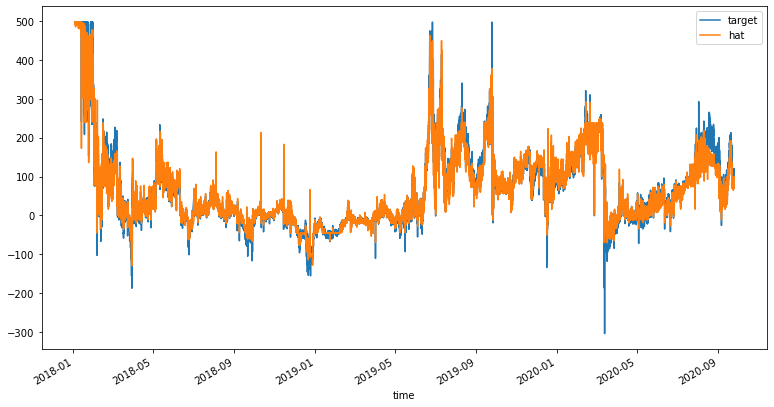

In [225]:
result_df.plot()

<AxesSubplot:xlabel='time'>

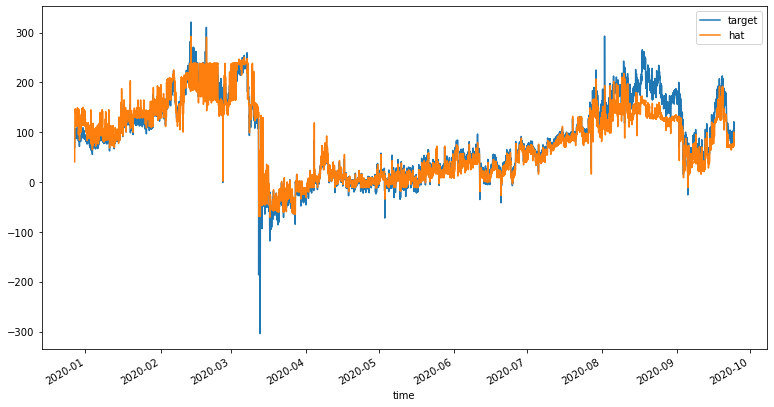

In [226]:
## testset
result_df[test_split:].plot()

In [227]:
## 모형성능이 준수할 것으로 보임

## Save

In [229]:
## 마지막 1포인트 예측값 추가
result_df.loc['2020-09-24 16:00:00'] = [ 0 , model.predict(X_add_scaled)[0]]

In [230]:
result_df.to_csv('data/result_ML.csv')